# <center>**Projeto Final da disciplina Estatística I**

<center><img src="capa.jpg">



### **Descrição**

Este notebook apresenta uma análise de dados feita a partir de datasets de estatíticas da Série A do campeonato brasileiro de futebol, no período de 2012 a 2022. 

### **Identificação da equipe**

**Grupo 3:** Lucas Cruz, Marianna Rossi, Mohara Nascimento, Pedro Henrique, Thiago

**Programa:** Santander Coders 2023

### **Dataset**

O conjunto de dados utilizado neste projeto foi retirado diretamente do kaggle. Cuja fonte é a seguinte:

- Estatísticas do Campeonato Brasileiro: https://www.kaggle.com/datasets/saulocampos/estatsticas-do-campeonado-brasileiro




### **Sumário**

1. [Importacao de bibliotecas](#1.-Importacao-de-bibliotecas)
2. [Carregamento dos dados](#2.-Carregamento-dos-dados)
3. [Visao geral do dataset](#3-visao-geral-do-dataset)
4. [Tratamento dos dados](#4-tratamento-dos-dados)

    4.1 [Dados nulos](#41-dados-nulos)

    4.2 [Manipulacao das colunas](#42-Manipulacao-das-colunas)

    4.3 [Descricao das colunas](#43-Descricao-das-colunas)

5. [Analise dos dados](#5-analise-dos-dados)

    5.1 [Descritiva geral](#51-descritiva-geral)

    5.2 [Analise das probabilidades dos times ganharem dentro e fora de casa](#52-analise-das-probabilidades-dos-times-ganharem-dentro-e-fora-de-casa)

    5.3 [Desempenho geral dos times e classificacao](#53-Desempenho-geral-dos-times-e-classificacao)

    5.4 [Tendencias das Casas de Apostas](#54-tendencias-das-casas-de-apostas)

### **[1. Importacao de bibliotecas](#1.-Importacao-de-bibliotecas)**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from scipy.stats import norm, linregress
from matplotlib.widgets import Button
%matplotlib inline
import ipywidgets as widgets
from IPython.display import clear_output

### **[2. Carregamento dos dados](#2.-Carregamento-dos-dados)**

In [38]:
# carrega base de dados e salva em um dataframe

df = pd.read_csv('BRA.csv')

### **[3. Visao geral do dataset](#3.-Visao-geral-do-dataset)**

In [39]:
# mostra primeiras linhas do dataframe

df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [40]:
# exibe últimas linhas do dataframe

df.tail()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
4165,Brazil,Serie A,2022,10/11/2022,00:30,Atletico GO,Athletico-PR,1.0,1.0,D,2.15,3.55,3.56,2.20,3.57,3.75,2.10,3.39,3.46
4166,Brazil,Serie A,2022,10/11/2022,00:30,Juventude,Flamengo RJ,2.0,2.0,D,5.65,3.84,1.68,6.15,4.00,1.68,5.45,3.75,1.64
4167,Brazil,Serie A,2022,10/11/2022,00:30,Palmeiras,America MG,2.0,1.0,H,1.51,4.44,6.27,1.61,4.89,6.57,1.52,4.50,5.59
4168,Brazil,Serie A,2022,10/11/2022,23:00,Atletico-MG,Cuiaba,3.0,0.0,H,1.47,4.38,7.98,1.52,4.40,8.00,1.46,4.17,7.25
4169,Brazil,Serie A,2022,10/11/2022,23:00,Botafogo RJ,Santos,3.0,0.0,H,2.24,3.30,3.60,2.29,3.60,3.76,2.21,3.24,3.37


In [41]:
# detalha as informações gerais e tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4170 non-null   object 
 1   League   4170 non-null   object 
 2   Season   4170 non-null   int64  
 3   Date     4170 non-null   object 
 4   Time     4170 non-null   object 
 5   Home     4170 non-null   object 
 6   Away     4170 non-null   object 
 7   HG       4169 non-null   float64
 8   AG       4169 non-null   float64
 9   Res      4169 non-null   object 
 10  PH       4169 non-null   float64
 11  PD       4169 non-null   float64
 12  PA       4169 non-null   float64
 13  MaxH     4170 non-null   float64
 14  MaxD     4170 non-null   float64
 15  MaxA     4170 non-null   float64
 16  AvgH     4170 non-null   float64
 17  AvgD     4170 non-null   float64
 18  AvgA     4170 non-null   float64
dtypes: float64(11), int64(1), object(7)
memory usage: 619.1+ KB


In [42]:
# mostra estatísticas descritivas para variáveis numéricas

df.describe()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
count,4170.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,2016.988010,1.413049,0.946030,2.308695,3.655570,4.716887,2.389823,3.760086,4.971638,2.231590,3.488293,4.347379
std,3.156941,1.158372,0.967422,0.964418,0.664663,2.535481,1.077162,0.690743,2.819727,0.898657,0.576835,2.170512
min,2012.000000,0.000000,0.000000,1.080000,2.540000,1.150000,1.090000,2.630000,0.000000,1.070000,2.510000,1.150000
25%,2014.000000,1.000000,0.000000,1.690000,3.260000,2.980000,1.730000,3.340000,3.060000,1.650000,3.150000,2.850000
50%,2017.000000,1.000000,1.000000,2.080000,3.450000,4.020000,2.150000,3.540000,4.150000,2.030000,3.300000,3.735000
75%,2020.000000,2.000000,1.000000,2.620000,3.860000,5.780000,2.700000,3.970000,6.100000,2.530000,3.660000,5.330000
max,2022.000000,6.000000,6.000000,17.680000,12.250000,29.580000,29.000000,12.500000,36.000000,20.230000,10.820000,26.580000


In [43]:
# realiza a soma das linhas nulas nas colunas do dataframe

df.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
PH         1
PD         1
PA         1
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

### **[4. Tratamento dos dados](#4.-Tratamento-dos-dados)**

#### **[4.1 Dados nulos](#4.1-Dados-nulos)**

O primeiro tratamento a ser feito é o referente aos valores nulos mostrados anteriormente na célula de código "df.isnull().sum()", a qual indica que uma das linhas das colunas HG, AG, Res, PH, PD e PA é nula. Para verificar que linha é essa vamos realizar um filtro.

In [44]:
df.loc[df['HG'].isnull()]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
1891,Brazil,Serie A,2016,11/12/2016,19:00,Chapecoense-SC,Atletico-MG,NaN,NaN,NaN,NaN,NaN,NaN,2.85,3.3,2.68,2.85,3.3,2.67


A partir de pesquisa externa, observou-se que o jogo da data com dados nulos foi cancelado.

<center><img src="jogo_cancelado.png">



E que isso se deu ao devido ao período no qual a equipe Chapecoense passava, pós-acidente aéreo. A fonte externa dessa informação é a seguinte:

https://www.uol.com.br/esporte/futebol/ultimas-noticias/2016/12/05/presidente-da-chape-diz-que-cbf-ja-cancelou-jogo-contra-o-atletico-mg.htm


Com isso, como o jogo não ocorreu e para evitar analisar dados inexistentes optamos por excluir essa linha do dataframe.


In [45]:
# elimina a linha com valores nulos

df.drop(df.loc[df['HG'].isnull()].index, inplace=True)

In [46]:
# verifica se agora o dataframe está sem valores nulos

df.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

#### **[4.2 Manipulacao das colunas](#4.2-Manipulacao-das-colunas)**

Com o intuito de melhorar a visualização das colunas e torná-las mais intuitivas, decidimos padronizar o nome das colunas referentes às casas de apostas Pinnacle (PH, PD, PA) e OddsPortal (MaxH, MaxD e MaxA). Para isso, modificamos as colunas da OddsPortal para seguir o padrão da Pinnacle, mudando a sigla "Max" para a letra "O". Além disso, decidimos usar os dados de odds das colunas AvgH, AvgD e AvgA (médias da Pinnacle) como sendo dados de uma casa de aposta fictícia que nomeamos de SuperBet.

In [47]:
# Renomear as colunas
df = df.rename(columns={
    'MaxH': 'OH',
    'MaxD': 'OD',
    'MaxA': 'OA',
    'AvgH': 'SH',
    'AvgD': 'SD',
    'AvgA': 'SA'
})

# Criando uma nova coluna com o resultado esperado pela Pinnacle após PA
df.insert(df.columns.get_loc('PA') + 1, 'PE', df[['PH', 'PD', 'PA']].apply(min, axis=1))

# Criando uma nova coluna com o resultado esperado pela OddsPortal após OA
df.insert(df.columns.get_loc('OA') + 1, 'OE', df[['OH', 'OD', 'OA']].apply(min, axis=1))

# Criando uma nova coluna com o resultado esperado pela SuperBet após SA
df.insert(df.columns.get_loc('SA') + 1, 'SE', df[['SH', 'SD', 'SA']].apply(min, axis=1))

# Atualizando os resultados esperados para os valores H, D ou A
for index, row in df.iterrows():
    if row['PE'] == row['PH']:
        df.at[index, 'PE'] = 'H'
    elif row['PE'] == row['PD']:
        df.at[index, 'PE'] = 'D'
    elif row['PE'] == row['PA']:
        df.at[index, 'PE'] = 'A'

    if row['OE'] == row['OH']:
        df.at[index, 'OE'] = 'H'
    elif row['OE'] == row['OD']:
        df.at[index, 'OE'] = 'D'
    elif row['OE'] == row['OA']:
        df.at[index, 'OE'] = 'A'

    if row['SE'] == row['SH']:
        df.at[index, 'SE'] = 'H'
    elif row['SE'] == row['SD']:
        df.at[index, 'SE'] = 'D'
    elif row['SE'] == row['SA']:
        df.at[index, 'SE'] = 'A'


# Adicionando coluna que define se a casa de aposta tendenciou o torcedor ao acerto ou ao erro

for index, row in df.iterrows():
    if row['PE'] == row['Res']:
        df.at[index, 'PR'] = 'A'
    else:
        df.at[index, 'PR'] = 'E'
    
    if row['OE'] == row['Res']:
        df.at[index, 'OR'] = 'A'
    else:
        df.at[index, 'OR'] = 'E'
    
    if row['SE'] == row['Res']:
        df.at[index, 'SR'] = 'A'
    else:
        df.at[index, 'SR'] = 'E'

#### **[4.3 Descricao das colunas](#4.3-Descricao-das-colunas)**


Após as manipulações iniciais, essas são as descrições das colunas presentes no DataFrame:

- Country: País do campeonato
- League: Nome da liga
- Season: Temporada
- Date: Data do jogo
- Time: Hora do jogo
- Home: Time da casa
- Away: Time visitante
- Draw: Empate
- HG: Gols do time da casa
- AG: Gols do time visitante
- Res: Resultado do jogo (D=Draw, H=Home win, A=Away win)
- PH: Valor pago pela casa de apostas Pinnacle para a vitória do time da casa.
- PD: Valor pago pela casa de apostas Pinnacle para o empate.
- PA: Valor pago pela casa de apostas Pinnacle para a vitória do time visitante.
- PE: Resultado esperado pela casa de apostas Pinnacle (H=Home win, D=Draw, A=Away win)
- OH: Valor pago pela casa de apostas OddsPortal para a vitória do time da casa.
- OD: Valor pago pela casa de apostas OddsPortal para o empate.
- OA: Valor pago pela casa de apostas OddsPortal para a vitória do time visitante.
- OE: Resultado esperado pela casa de apostas OddsPortal (H=Home win, D=Draw, A=Away win)
- SH: Valor pago pela casa de apostas SuperBet para a vitória do time da casa.
- SD: Valor pago pela casa de apostas SuperBet para o empate.
- SA: Valor pago pela casa de apostas SuperBet para a vitória do time visitante.
- SE: Resultado esperado pela casa de apostas SuperBet (H=Home win, D=Draw, A=Away win)
- PR: Define se a Pinnacle tendenciou o torcedor ao acerto ou ao erro
- OR: Define se a OddsPortal tendenciou o torcedor ao acerto ou ao erro
- SR: Define se a Superbet tendenciou o torcedor ao acerto ou ao erro

Foram acrescentadas as colunas PE, OE e SE, que representam o resultado esperado por cada casa de aposta, para cada jogo. Foi seguido o padrão da coluna Res.

In [48]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,OD,OA,OE,SH,SD,SA,SE,PR,OR,SR
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,...,3.87,5.31,H,1.69,3.50,4.90,H,E,E,E
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,...,3.42,2.70,A,2.59,3.23,2.58,A,E,E,E
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,...,4.05,7.22,H,1.59,3.67,5.64,H,A,A,A
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,...,3.39,3.15,H,2.35,3.26,2.84,H,A,A,A
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,...,3.53,4.41,H,1.89,3.33,3.89,H,E,E,E


### **[5. Analise dos dados](#5.-Analise-dos-dados)**

#### **[5.1 Descritiva geral](#5.1-Descritiva-geral)**

Inicialmente fizemos uma análise geral apenas para ter um overview dos dados do dataset. Para isso, obtemos dados como média, mediana e desvio padrão das colunas referentes aos gols dos times da casa e visitante.

Média de gols do time da casa: 1.41304869273207
Mediana de gols do time da casa: 1.0
Desvio padrão de gols do time da casa: 1.1583720697578355

Média de gols do time visitante: 0.946030223075078
Mediana de gols do time visitante: 1.0
Desvio padrão de gols do time visitante: 0.967422421737572
--------------------
Res
H    2028
D    1129
A    1012
Name: count, dtype: int64
--------------------


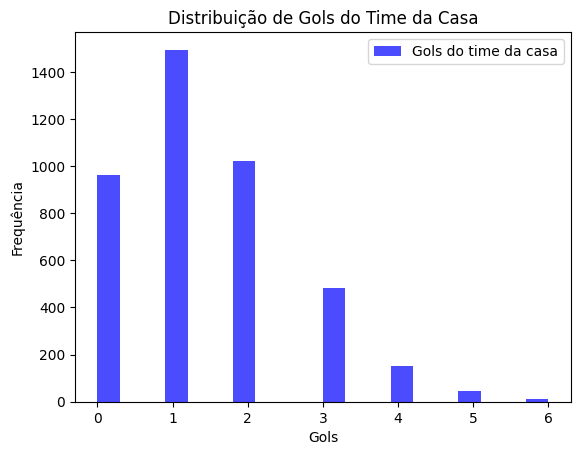

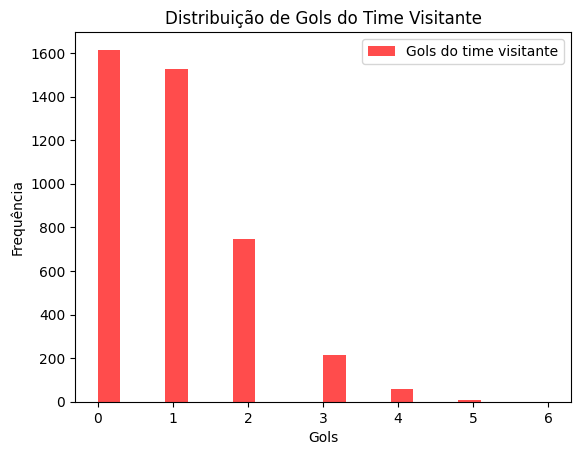

--------------------
Estatísticas por Temporada:
              HG        AG
Season                    
2012    1.471053  1.002632
2013    1.468421  0.994737
2014    1.421053  0.842105
2015    1.460526  0.900000
2016    1.488127  0.918206
2017    1.384211  1.044737
2018    1.381579  0.794737
2019    1.381579  0.923684
2020    1.410526  1.073684
2021    1.271053  0.944737
2022    1.405405  0.967568

Estatísticas por Liga:
               HG       AG
League                    
Serie A  1.413049  0.94603
--------------------
Número de acertos da Pinnacle: 2148 vezes em um total de 4169.
Número de acertos da OddsPortal: 2139 vezes em um total de 4169.
Número de acertos da SuperBet: 2142 vezes em um total de 4169.
--------------------


In [49]:
# Média, Mediana e Desvio Padrão:
# Calculando média, mediana e desvio padrão para HG (Gols do time da casa)
media_HG = df['HG'].mean()
mediana_HG = df['HG'].median()
desvio_padrao_HG = df['HG'].std()

# Calculando média, mediana e desvio padrão para AG (Gols do time visitante)
media_AG = df['AG'].mean()
mediana_AG = df['AG'].median()
desvio_padrao_AG = df['AG'].std()

# Exibindo os resultados
print(f"Média de gols do time da casa: {media_HG}")
print(f"Mediana de gols do time da casa: {mediana_HG}")
print(f"Desvio padrão de gols do time da casa: {desvio_padrao_HG}")
print(f"\nMédia de gols do time visitante: {media_AG}")
print(f"Mediana de gols do time visitante: {mediana_AG}")
print(f"Desvio padrão de gols do time visitante: {desvio_padrao_AG}")
print('--------------------')

#Estatísticas de Resultados:
# Contagem de resultados
contagem_resultados = df['Res'].value_counts()

# Exibindo os resultados
print(contagem_resultados)
print('--------------------')

# Distribuição de Gols:
# Histograma de gols do time da casa (HG)
plt.hist(df['HG'], bins=20, color='blue', alpha=0.7, label='Gols do time da casa')
plt.xlabel('Gols')
plt.ylabel('Frequência')
plt.title('Distribuição de Gols do Time da Casa')
plt.legend()
plt.show()

# Histograma de gols do time visitante (AG)
plt.hist(df['AG'], bins=20, color='red', alpha=0.7, label='Gols do time visitante')
plt.xlabel('Gols')
plt.ylabel('Frequência')
plt.title('Distribuição de Gols do Time Visitante')
plt.legend()
plt.show()
print('--------------------')

# Estatísticas por Temporada ou Liga:
# Agregando por temporada
estatisticas_por_temporada = df.groupby('Season')[['HG', 'AG']].mean()

# Agregando por liga
estatisticas_por_liga = df.groupby('League')[['HG', 'AG']].mean()

# Exibindo os resultados
print("Estatísticas por Temporada:")
print(estatisticas_por_temporada)

print("\nEstatísticas por Liga:")
print(estatisticas_por_liga)
print('--------------------')

# Resultados Esperados vs. Resultados Reais:
# Contando acertos e erros da Pinnacle
acertos_Pinnacle = df[df['PE'] == df['Res']].shape[0]
erros_Pinnacle = df[df['PE'] != df['Res']].shape[0]

# Contando acertos e erros da OddsPortal
acertos_OddsPortal = df[df['OE'] == df['Res']].shape[0]
erros_OddsPortal = df[df['OE'] != df['Res']].shape[0]

# Contando acertos e erros da SuperBet
acertos_SuperBet = df[df['SE'] == df['Res']].shape[0]
erros_SuperBet = df[df['SE'] != df['Res']].shape[0]

# Exibindo os resultados
print(f"Número de acertos da Pinnacle: {acertos_Pinnacle} vezes em um total de {acertos_Pinnacle+erros_Pinnacle}.")
print(f"Número de acertos da OddsPortal: {acertos_OddsPortal} vezes em um total de {acertos_OddsPortal+erros_OddsPortal}.")
print(f"Número de acertos da SuperBet: {acertos_SuperBet} vezes em um total de {acertos_SuperBet+erros_SuperBet}.")
print('--------------------')

#### **[5.2 Analise das probabilidades dos times ganharem dentro e fora de casa](#5.2-Analise-das-probabilidades-dos-times-ganharem-dentro-e-fora-de-casa)**

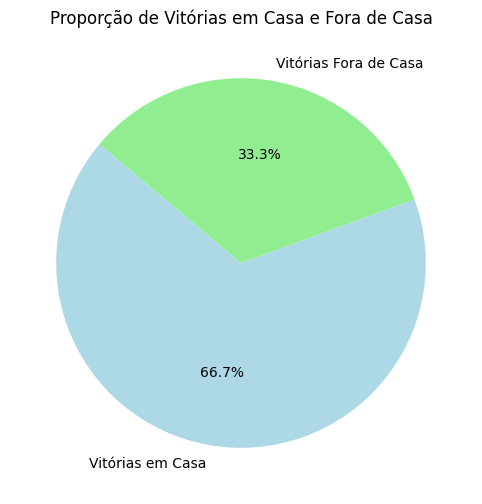

In [50]:
# Contar o número de vitórias em casa e vitórias fora de casa
num_vitorias_casa = len(df[df['Res'] == 'H'])
num_vitorias_fora = len(df[df['Res'] == 'A'])

# Rótulos para as fatias do gráfico de pizza
labels = ['Vitórias em Casa', 'Vitórias Fora de Casa']

# Dados para as fatias do gráfico de pizza
sizes = [num_vitorias_casa, num_vitorias_fora]

# Cores para as fatias do gráfico de pizza
colors = ['lightblue', 'lightgreen']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporção de Vitórias em Casa e Fora de Casa')
plt.show()

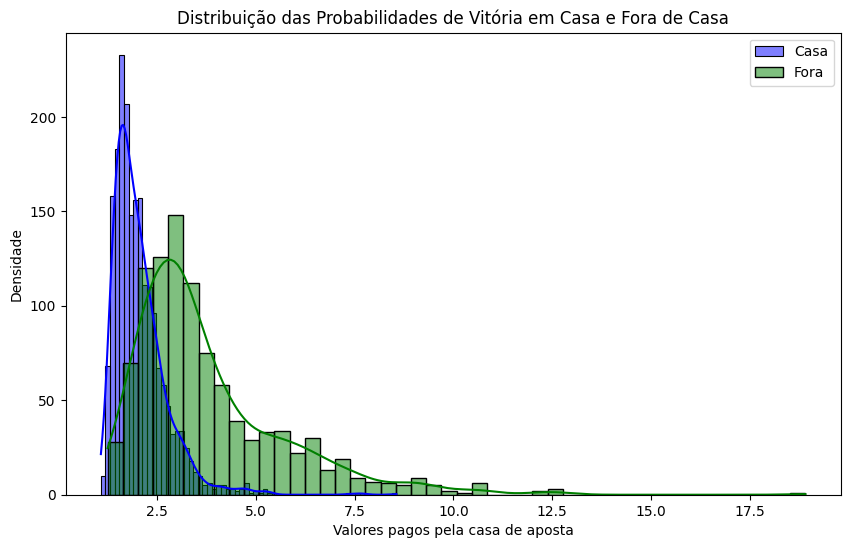

In [51]:
# Filtrar o DataFrame para incluir apenas partidas vencidas em casa e fora de casa
df_casa = df[df['Res'] == 'H']
df_fora = df[df['Res'] == 'A']

# Criar uma figura com tamanho personalizado (largura=10, altura=6 polegadas)
plt.figure(figsize=(10, 6))

# Criar um histograma para as probabilidades de vitória em casa e fora de casa
sns.histplot(data=df_casa['PH'], kde=True, label='Casa', color='blue')
sns.histplot(data=df_fora['PA'], kde=True, label='Fora', color='green')

# Adicionar rótulos aos eixos x e y para interpretar o gráfico
plt.xlabel('Valores pagos pela casa de aposta')  # Rótulo do eixo x
plt.ylabel('Densidade')  # Rótulo do eixo y

# Adicionar um título ao gráfico para descrever o conteúdo
plt.title('Distribuição das Probabilidades de Vitória em Casa e Fora de Casa')

# Adicionar uma legenda para identificar as cores no gráfico
plt.legend()

# Exibir o gráfico
plt.show()

In [52]:
# Inicializar um dicionário para armazenar os dados
dados = {
    'Time': [],  # Lista para armazenar nomes dos times
    'VitoriasCasa': [],  # Lista para armazenar contagem de vitórias em casa
    'DerrotasCasa': [],  # Lista para armazenar contagem de derrotas em casa
    'VitoriasFora': [],  # Lista para armazenar contagem de vitórias fora de casa
    'DerrotasFora': [],  # Lista para armazenar contagem de derrotas fora de casa
    'ProbabilidadeVitoriaCasa': [],  # Lista para armazenar a probabilidade de vitória em casa
    'ProbabilidadeVitoriaFora': []  # Lista para armazenar a probabilidade de vitória fora de casa
}

# Iterar sobre o DataFrame original para contar vitórias e derrotas para cada time
for time in df['Home'].unique():
    vitorias_casa = len(df[(df['Home'] == time) & (df['Res'] == 'H')])
    derrotas_casa = len(df[(df['Home'] == time) & (df['Res'] == 'A')])
    vitorias_fora = len(df[(df['Away'] == time) & (df['Res'] == 'A')])
    derrotas_fora = len(df[(df['Away'] == time) & (df['Res'] == 'H')])
    
    total_partidas_casa = vitorias_casa + derrotas_casa
    total_partidas_fora = vitorias_fora + derrotas_fora
    
    # Calcular as probabilidades
    probabilidade_vitoria_casa = vitorias_casa / total_partidas_casa if total_partidas_casa != 0 else 0
    probabilidade_vitoria_fora = vitorias_fora / total_partidas_fora if total_partidas_fora != 0 else 0
    
    # Adicionar dados ao dicionário
    dados['Time'].append(time)
    dados['VitoriasCasa'].append(vitorias_casa)
    dados['DerrotasCasa'].append(derrotas_casa)
    dados['VitoriasFora'].append(vitorias_fora)
    dados['DerrotasFora'].append(derrotas_fora)
    dados['ProbabilidadeVitoriaCasa'].append(probabilidade_vitoria_casa)
    dados['ProbabilidadeVitoriaFora'].append(probabilidade_vitoria_fora)

# Criar o DataFrame a partir do dicionário de dados
df_times = pd.DataFrame(dados)

# Maior probabilidade de ganhar fora de casa:
df_times.sort_values(by='ProbabilidadeVitoriaFora', ascending=False).head(5)

,Time,VitoriasCasa,DerrotasCasa,VitoriasFora,DerrotasFora,ProbabilidadeVitoriaCasa,ProbabilidadeVitoriaFora
0,Palmeiras,110,39,70,71,0.738255,0.496454
11,Flamengo RJ,122,40,75,78,0.753086,0.490196
14,Atletico-MG,133,36,61,78,0.786982,0.438849
19,Gremio,114,33,56,74,0.775510,0.430769
17,Sao Paulo,109,34,64,88,0.762238,0.421053


In [53]:
# Menor probabilidade de ganhar fora de casa:
df_times.sort_values(by='ProbabilidadeVitoriaFora', ascending=True).head(5)

,Time,VitoriasCasa,DerrotasCasa,VitoriasFora,DerrotasFora,ProbabilidadeVitoriaCasa,ProbabilidadeVitoriaFora
29,Parana,3,6,1,17,0.333333,0.055556
26,Joinville,6,6,1,15,0.500000,0.062500
27,Santa Cruz,7,10,1,13,0.411765,0.071429
13,Nautico,16,16,3,29,0.500000,0.093750
36,Juventude,11,12,3,23,0.478261,0.115385


In [54]:
# Maior probabilidade de ganhar em casa:
df_times.sort_values(by='ProbabilidadeVitoriaCasa', ascending=False).head(5)

,Time,VitoriasCasa,DerrotasCasa,VitoriasFora,DerrotasFora,ProbabilidadeVitoriaCasa,ProbabilidadeVitoriaFora
4,Corinthians,117,25,59,87,0.823944,0.404110
14,Atletico-MG,133,36,61,78,0.786982,0.438849
22,Atletico-PR,69,19,25,63,0.784091,0.284091
16,Santos,119,33,52,96,0.782895,0.351351
19,Gremio,114,33,56,74,0.775510,0.430769


In [55]:
# Menor probabilidade de ganhar em casa:
df_times.sort_values(by='ProbabilidadeVitoriaCasa', ascending=True).head(5)

,Time,VitoriasCasa,DerrotasCasa,VitoriasFora,DerrotasFora,ProbabilidadeVitoriaCasa,ProbabilidadeVitoriaFora
29,Parana,3,6,1,17,0.333333,0.055556
27,Santa Cruz,7,10,1,13,0.411765,0.071429
25,Avai,21,28,11,50,0.428571,0.180328
32,CSA,6,8,2,14,0.428571,0.125000
10,Atletico GO,27,36,22,47,0.428571,0.318841


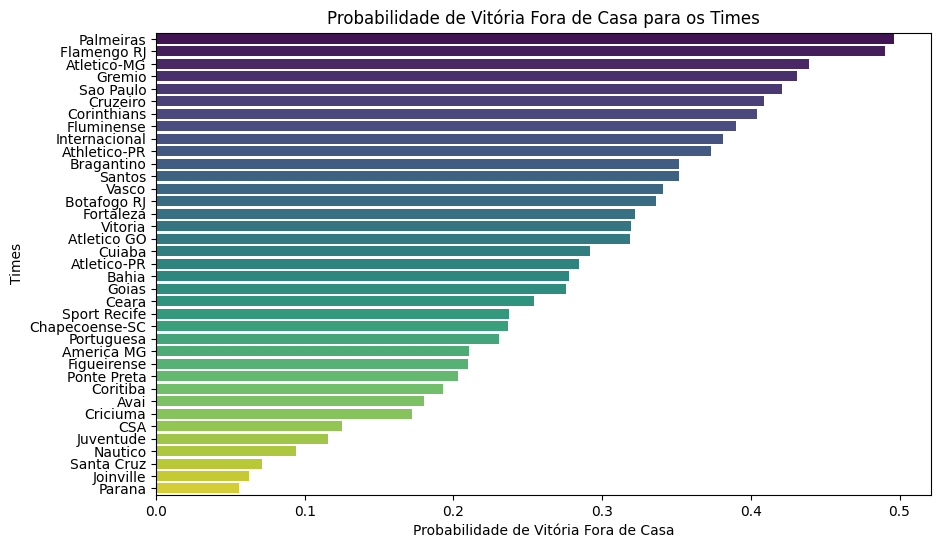

In [56]:
# Ordenar o DataFrame pela maior probabilidade de vitória fora de casa
df_prob_fora = df_times.sort_values(by='ProbabilidadeVitoriaFora', ascending=False)

# Criar o gráfico de barras para as probabilidades de vitória fora de casa
plt.figure(figsize=(10, 6))
sns.barplot(x='ProbabilidadeVitoriaFora', y='Time', data=df_prob_fora, palette='viridis')
plt.xlabel('Probabilidade de Vitória Fora de Casa')
plt.ylabel('Times')
plt.title('Probabilidade de Vitória Fora de Casa para os Times')
plt.show()

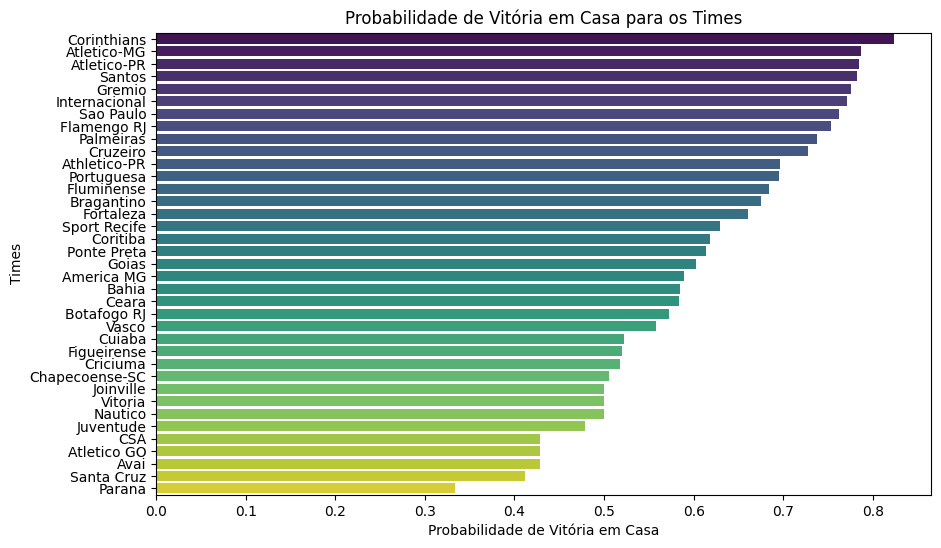

In [57]:
# Ordenar o DataFrame pela maior probabilidade de vitória em casa
df_prob_casa = df_times.sort_values(by='ProbabilidadeVitoriaCasa', ascending=False)

# Criar o gráfico de barras para as probabilidades de vitória em casa
plt.figure(figsize=(10, 6))
sns.barplot(x='ProbabilidadeVitoriaCasa', y='Time', data=df_prob_casa, palette='viridis')
plt.xlabel('Probabilidade de Vitória em Casa')
plt.ylabel('Times')
plt.title('Probabilidade de Vitória em Casa para os Times')
plt.show()

#### **[5.3 Desempenho geral dos times e classificacao](#5.3-Desempenho-geral-dos-times-e-classificacao)**

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['turno'] = df['Date'].apply(lambda x: 1 if x.month <= 6 else 2)
df['pontos_time_da_casa'] = df.apply(lambda row: 3 if row['HG'] > row['AG'] else (1 if row['HG'] == row['AG'] else -3), axis=1)

times = pd.DataFrame() 
times['nome_time'] = df['Home']
times['ano'] = df['Season']
times['turno'] = df['turno']
times['pontos'] = 0
times.drop_duplicates(inplace=True)

C:\Users\mohar\AppData\Local\Temp\ipykernel_7812\2135679350.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


In [59]:
for index, row in df.iterrows():

    if row['pontos_time_da_casa'] == 1:
        indexx = times[
            (times['ano'] == row['Season'])  & (times['turno'] == row['turno']) &  (times['nome_time'] == row['Home'])
        ].index
        times.loc[indexx, 'pontos'] += 1

        indexx = times[
            (times['ano'] == row['Season'])  & (times['turno'] == row['turno']) &  (times['nome_time'] == row['Away']) 
            ].index
        times.loc[indexx, 'pontos'] += 1
        
    elif row['pontos_time_da_casa'] == 3:
        indexx = times[
            (times['ano'] == row['Season']) & (times['turno'] == row['turno']) & (times['nome_time'] == row['Home'])
        ].index
        times.loc[indexx, 'pontos'] += 3
    else:
        indexx = times[
            (times['ano'] == row['Season']) & (times['turno'] == row['turno']) & (times['nome_time'] == row['Away']) 
            ].index
        times.loc[indexx, 'pontos'] += 3

times.sort_values(by=['ano', 'turno', 'pontos'], ascending=False, inplace=True)

In [60]:
df_final = pd.DataFrame(columns=['Campeao_1T','Campeao_2T','Campeao', 'Ano'])

def func(ano):    
    filtro = (times['ano'] == ano) & (times['turno'] == 2)
    dados_2022_turno2 = times[filtro]

    # Encontrar o time com mais pontos no ano de 2022 no turno 2
    time_2022_turno2 = dados_2022_turno2.loc[dados_2022_turno2['pontos'].idxmax()]['nome_time']


    filtro = (times['ano'] == ano) & (times['turno'] == 1)
    dados_2022_turno1 = times[filtro]

    # Encontrar o time com mais pontos no ano de 2022 no turno 2
    time_2022_turno1 = dados_2022_turno1.loc[dados_2022_turno1['pontos'].idxmax()]['nome_time']

    filtro = (times['ano'] == ano) 
    dados_2022 = times[filtro]
    # Encontrar o time com mais pontos no ano de 2022 no turno 2
    time_2022 = dados_2022.loc[dados_2022['pontos'].idxmax()]['nome_time']


    print(f' Campeão {ano}_1T: {time_2022_turno1},\t\tCampeão {ano}_2T: {ano}:{time_2022_turno2},\t\tCampeão {ano}: {time_2022}')
    df_final.loc[len(df_final)] = [time_2022_turno1, time_2022_turno2, time_2022, ano]

for ano in range(2012, 2023):
    func(ano)
df_final

 Campeão 2012_1T: Vasco,		Campeão 2012_2T: 2012:Fluminense,		Campeão 2012: Fluminense
 Campeão 2013_1T: Coritiba,		Campeão 2013_2T: 2013:Cruzeiro,		Campeão 2013: Cruzeiro
 Campeão 2014_1T: Cruzeiro,		Campeão 2014_2T: 2014:Cruzeiro,		Campeão 2014: Cruzeiro
 Campeão 2015_1T: Sport Recife,		Campeão 2015_2T: 2015:Corinthians,		Campeão 2015: Corinthians
 Campeão 2016_1T: Palmeiras,		Campeão 2016_2T: 2016:Palmeiras,		Campeão 2016: Palmeiras
 Campeão 2017_1T: Corinthians,		Campeão 2017_2T: 2017:Palmeiras,		Campeão 2017: Palmeiras
 Campeão 2018_1T: Flamengo RJ,		Campeão 2018_2T: 2018:Palmeiras,		Campeão 2018: Palmeiras
 Campeão 2019_1T: Palmeiras,		Campeão 2019_2T: 2019:Flamengo RJ,		Campeão 2019: Flamengo RJ
 Campeão 2020_1T: Fluminense,		Campeão 2020_2T: 2020:Sao Paulo,		Campeão 2020: Sao Paulo
 Campeão 2021_1T: Bragantino,		Campeão 2021_2T: 2021:Atletico-MG,		Campeão 2021: Atletico-MG
 Campeão 2022_1T: Palmeiras,		Campeão 2022_2T: 2022:Palmeiras,		Campeão 2022: Palmeiras


,Campeao_1T,Campeao_2T,Campeao,Ano
0,Vasco,Fluminense,Fluminense,2012
1,Coritiba,Cruzeiro,Cruzeiro,2013
2,Cruzeiro,Cruzeiro,Cruzeiro,2014
3,Sport Recife,Corinthians,Corinthians,2015
4,Palmeiras,Palmeiras,Palmeiras,2016
5,Corinthians,Palmeiras,Palmeiras,2017
6,Flamengo RJ,Palmeiras,Palmeiras,2018
7,Palmeiras,Flamengo RJ,Flamengo RJ,2019
8,Fluminense,Sao Paulo,Sao Paulo,2020
9,Bragantino,Atletico-MG,Atletico-MG,2021


<img src='espanhol.jpeg'> <img src='ingles.jpeg'>

#### **[5.4 Tendencias das Casas de Apostas](#5.4-Tendencias-das-Casas-de-Apostas)**

- **Acertos e erros das casas de apostas de 2012 a 2022**

In [61]:
# retorna uma tupla onde True é a quantidade resultados A, ou seja, de acertos e False é a quantidade de valores diferentes de A, ou seja, E de erros

df.value_counts(df['PR']=='A') #referente à Pinnacle

PR
True     2148
False    2021
Name: count, dtype: int64

In [62]:
# Pinnacle

p_acertos = df.value_counts(df['PR']=='A')[True]*100/df.value_counts(df['PR']).sum()
p_erros = df.value_counts(df['PR']=='A')[False]*100/df.value_counts(df['PR']).sum()

print(f'Porcentagem de acertos (Pinnacle): {round(p_acertos,2)} %')
print(f'Porcentagem de erros (Pinnacle): {round(p_erros,2)}%')

# OddsPortal

o_acertos = df.value_counts(df['OR']=='A')[True]*100/df.value_counts(df['OR']).sum()
o_erros = df.value_counts(df['OR']=='A')[False]*100/df.value_counts(df['OR']).sum()

#SuperBet

s_acertos = df.value_counts(df['SR']=='A')[True]*100/df.value_counts(df['SR']).sum()
s_erros = df.value_counts(df['SR']=='A')[False]*100/df.value_counts(df['SR']).sum()

Porcentagem de acertos (Pinnacle): 51.52 %
Porcentagem de erros (Pinnacle): 48.48%


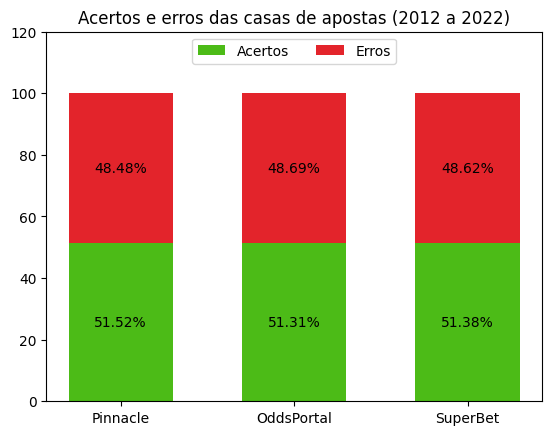

In [63]:
# Gráfico de acertos e erros das casas de apostas de 2012 a 2022

casas_de_apostas = ('Pinnacle','OddsPortal','SuperBet')
porcentagens_ae = {
    'Acertos': np.array([p_acertos,o_acertos,s_acertos]),
    'Erros': np.array([p_erros, o_erros,s_erros])
}
width = 0.6 #larguras das barras

fig, ax = plt.subplots()
bottom = np.zeros(3)

for valor, porcentagens_ae in porcentagens_ae.items():
    p = ax.bar(casas_de_apostas, porcentagens_ae, width, label=valor, bottom=bottom, color='#4CBB17' if valor == 'Acertos' else '#E3242B')
    bottom += porcentagens_ae

    ax.bar_label(p, label_type='center', fmt=lambda x: f'{x:.2f}%')

ax.set_title('Acertos e erros das casas de apostas (2012 a 2022)')
ax.legend(loc='upper center', ncols=2)
ax.set_ylim(0, 120)

plt.show()

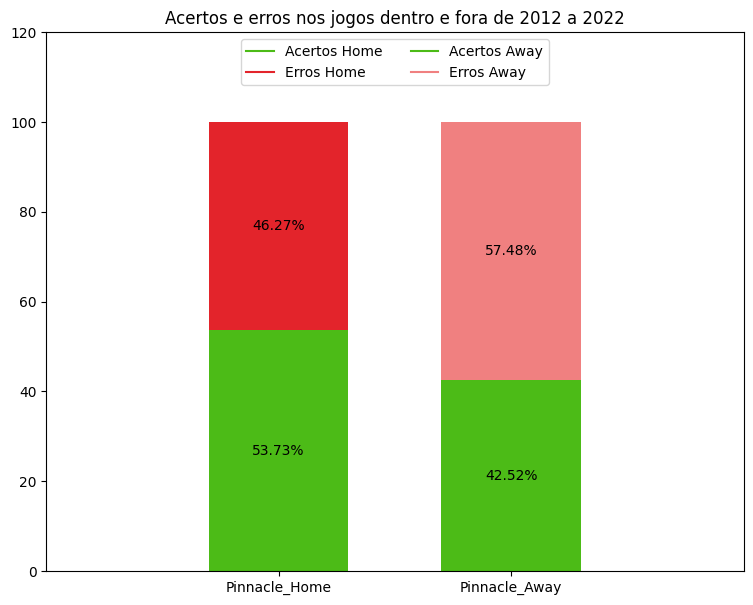

In [64]:
# Porcentagens de acertos e erros da Pinnacle quando o resultado esperado é de vitória do time de casa ou de fora de casa

pr_home = df.loc[(df['PE']=='H')]
pr_away = df.loc[(df['PE']=='A')]

# Gráfico de acertos e erros das casas de apostas para os jogos do Palmeiras em 2022 dentro e fora de casa, separadamente

casas = ('Pinnacle_Home', 'Pinnacle_Away')

porcentagens_fd_pr = {
    'Acertos': np.array([
        pr_home.value_counts(pr_home['PR']=='A')[True]*100/pr_home.value_counts(pr_home['PR']).sum(),
        pr_away.value_counts(pr_away['PR']=='A')[True]*100/pr_away.value_counts(pr_away['PR']).sum()
        ]),
    'Erros': np.array([
        pr_home.value_counts(pr_home['PR']=='A')[False]*100/pr_home.value_counts(pr_home['PR']).sum(),
        pr_away.value_counts(pr_away['PR']=='A')[False]*100/pr_away.value_counts(pr_away['PR']).sum()
    ]),
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for valor, porcentagens_fd_pr in porcentagens_fd_pr.items():
    p = ax.bar(casas, porcentagens_fd_pr, width, label=valor, bottom=bottom, 
               color=('#4CBB17' if valor == 'Acertos' else '#E3242B',"#4CBB17"if valor == 'Acertos' else 'lightcoral'))
    bottom += porcentagens_fd_pr
    ax.bar_label(p, label_type='center', fmt=lambda x: f'{x:.2f}%')

ax.set_title('Acertos e erros nos jogos dentro e fora de 2012 a 2022')
line1, = ax.plot([-10, -10, -10], label='Acertos Away', color='#4CBB17')
line2, = ax.plot([-10, -10, -10], label='Erros Away', color="lightcoral")
line3, = ax.plot([-10, -10, -10], label='Acertos Home', color='#4CBB17')
line4, = ax.plot([-10, -10, -10], label='Erros Home', color='#E3242B')
ax.legend(handles=[line3, line4, line1, line2], loc='upper center', ncols=2)
ax.set_ylim(0, 120)
ax.set_xlim(-1, 2)
fig.set_size_inches(9, 7)
plt.show()

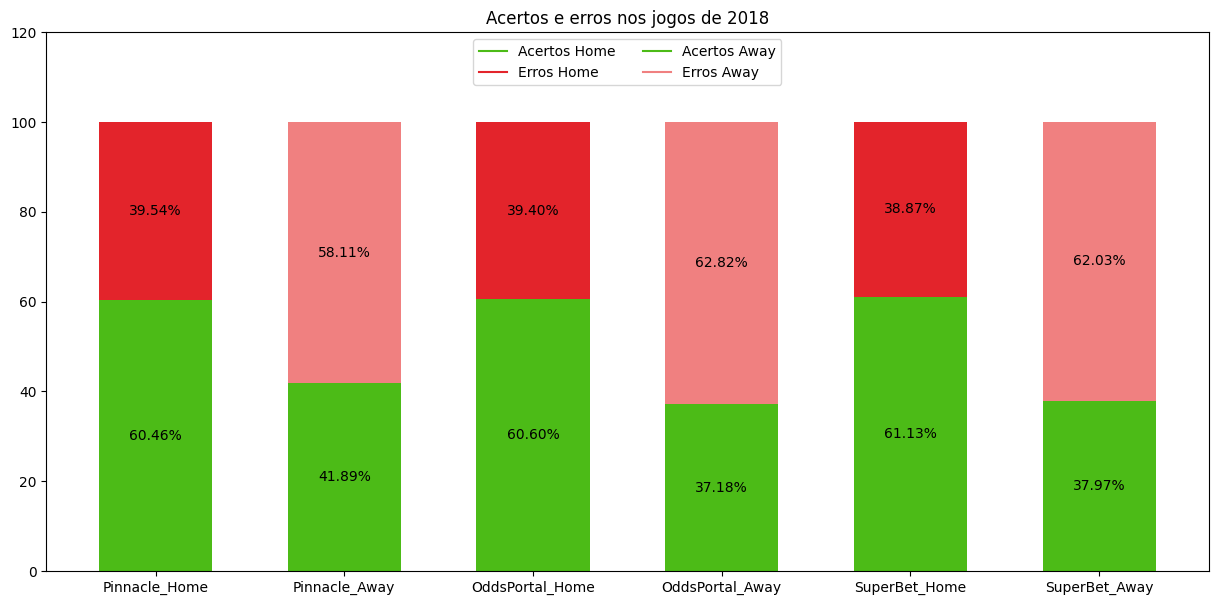

In [65]:
button1 = widgets.Button(description="2018")
button2 = widgets.Button(description="2019")
button3 = widgets.Button(description="2020")
button4 = widgets.Button(description="2021")
button5 = widgets.Button(description="2022")
out = widgets.Output()

buttons = widgets.VBox(children=[button1, button2, button3, button4, button5])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

casas = ('Pinnacle_Home', 'Pinnacle_Away','OddsPortal_Home','OddsPortal_Away','SuperBet_Home', 'SuperBet_Away')

#df.loc[df['PE']=='H']
def graf(ano): 
    aux_home_p = df.loc[((df['Season']==ano) & (df['PE']=='H'))]
    aux_away_p = df.loc[((df['Season']==ano)& (df['PE']=='A'))]
    aux_home_o = df.loc[((df['Season']==ano) & (df['OE']=='H'))]
    aux_away_o = df.loc[((df['Season']==ano)& (df['OE']=='A'))]
    aux_home_s = df.loc[((df['Season']==ano) & (df['SE']=='H'))]
    aux_away_s = df.loc[((df['Season']==ano)& (df['SE']=='A'))]

    porc_aux = {
    'Acertos': np.array([
        aux_home_p.value_counts(aux_home_p['PR']=='A')[True]*100/aux_home_p.value_counts(aux_home_p['PR']).sum(),
        aux_away_p.value_counts(aux_away_p['PR']=='A')[True]*100/aux_away_p.value_counts(aux_away_p['PR']).sum(),
        aux_home_o.value_counts(aux_home_o['OR']=='A')[True]*100/aux_home_o.value_counts(aux_home_o['OR']).sum(),
        aux_away_o.value_counts(aux_away_o['OR']=='A')[True]*100/aux_away_o.value_counts(aux_away_o['OR']).sum(),
        aux_home_s.value_counts(aux_home_s['SR']=='A')[True]*100/aux_home_s.value_counts(aux_home_s['SR']).sum(),
        aux_away_s.value_counts(aux_away_s['SR']=='A')[True]*100/aux_away_s.value_counts(aux_away_s['SR']).sum()
        ]),
    'Erros': np.array([
        aux_home_p.value_counts(aux_home_p['PR']=='A')[False]*100/aux_home_p.value_counts(aux_home_p['PR']).sum(),
        aux_away_p.value_counts(aux_away_p['PR']=='A')[False]*100/aux_away_p.value_counts(aux_away_p['PR']).sum(),
        aux_home_o.value_counts(aux_home_o['OR']=='A')[False]*100/aux_home_o.value_counts(aux_home_o['OR']).sum(),
        aux_away_o.value_counts(aux_away_o['OR']=='A')[False]*100/aux_away_o.value_counts(aux_away_o['OR']).sum(),
        aux_home_s.value_counts(aux_home_s['SR']=='A')[False]*100/aux_home_s.value_counts(aux_home_s['SR']).sum(),
        aux_away_s.value_counts(aux_away_s['SR']=='A')[False]*100/aux_away_s.value_counts(aux_away_s['SR']).sum()
    ]),
    }
    fig, ax = plt.subplots()
    bottom = np.zeros(6)

    for valor, porc_aux in porc_aux.items():
        p = ax.bar(casas, porc_aux, width, label=valor, bottom=bottom, 
               color=('#4CBB17' if valor == 'Acertos' else '#E3242B',"#4CBB17"if valor == 'Acertos' else 'lightcoral'))
        bottom += porc_aux
        ax.bar_label(p, label_type='center', fmt=lambda x: f'{x:.2f}%')

    ax.set_title(f'Acertos e erros nos jogos de {ano}')
    line1, = ax.plot([-10, -10, -10], label='Acertos Away', color='#4CBB17')
    line2, = ax.plot([-10, -10, -10], label='Erros Away', color="lightcoral")
    line3, = ax.plot([-10, -10, -10], label='Acertos Home', color='#4CBB17')
    line4, = ax.plot([-10, -10, -10], label='Erros Home', color='#E3242B')
    ax.legend(handles=[line3, line4, line1, line2], loc='upper center', ncols=2)
    ax.set_ylim(0, 120)
    fig.set_size_inches(15, 7)
    clear_output(wait=True)
    plt.show()
    display(all_widgets)

def chamar_botao_2018(b):
    graf(2018)

def chamar_botao_2019(b):
    graf(2019)

def chamar_botao_2020(b):
    graf(2020)

def chamar_botao_2021(b):
    graf(2021)

def chamar_botao_2022(b):
    graf(2022)

if button1.on_click(chamar_botao_2018):
    print('chamar')

if button2.on_click(chamar_botao_2019):
    print('chamar')

if button3.on_click(chamar_botao_2020):
    print('chamar')

if button4.on_click(chamar_botao_2021):
    print('chamar')

if button5.on_click(chamar_botao_2022):
    print('chamar')

- **Resultados das casas de apostas nos jogos do Palmeiras e do Ceara (2018 a 2022)**

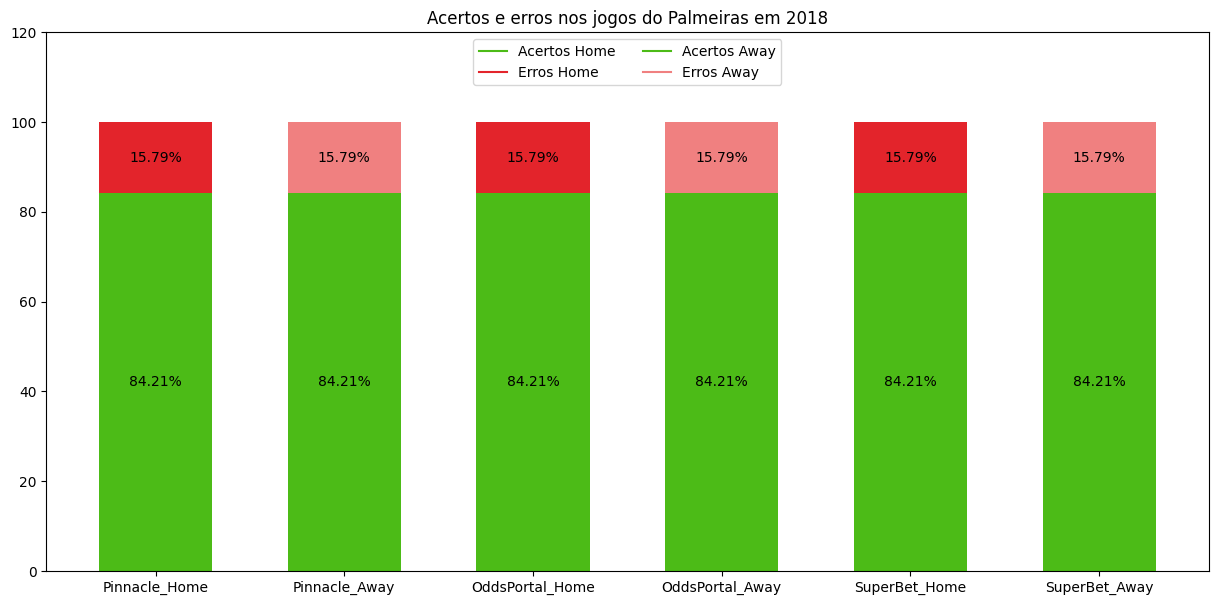

In [66]:
#Palmeiras: resultados

button1 = widgets.Button(description="2018")
button2 = widgets.Button(description="2019")
button3 = widgets.Button(description="2020")
button4 = widgets.Button(description="2021")
button5 = widgets.Button(description="2022")
out = widgets.Output()

buttons = widgets.VBox(children=[button1, button2, button3, button4, button5])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

casas = ('Pinnacle_Home', 'Pinnacle_Away','OddsPortal_Home','OddsPortal_Away','SuperBet_Home', 'SuperBet_Away')


def graf(ano): 
    aux_home = df.loc[((df['Season']==ano)& (df['Home']=='Palmeiras'))]
    aux_away = df.loc[((df['Season']==ano)& (df['Home']=='Palmeiras'))]

    porc_aux = {
    'Acertos': np.array([
        aux_home.value_counts(aux_home['PR']=='A')[True]*100/aux_home.value_counts(aux_home['PR']).sum(),
        aux_away.value_counts(aux_away['PR']=='A')[True]*100/aux_away.value_counts(aux_away['PR']).sum(),
        aux_home.value_counts(aux_home['OR']=='A')[True]*100/aux_home.value_counts(aux_home['OR']).sum(),
        aux_away.value_counts(aux_away['OR']=='A')[True]*100/aux_away.value_counts(aux_away['OR']).sum(),
        aux_home.value_counts(aux_home['SR']=='A')[True]*100/aux_home.value_counts(aux_home['SR']).sum(),
        aux_away.value_counts(aux_away['SR']=='A')[True]*100/aux_away.value_counts(aux_away['SR']).sum()
        ]),
    'Erros': np.array([
        aux_home.value_counts(aux_home['PR']=='A')[False]*100/aux_home.value_counts(aux_home['PR']).sum(),
        aux_away.value_counts(aux_away['PR']=='A')[False]*100/aux_away.value_counts(aux_away['PR']).sum(),
        aux_home.value_counts(aux_home['OR']=='A')[False]*100/aux_home.value_counts(aux_home['OR']).sum(),
        aux_away.value_counts(aux_away['OR']=='A')[False]*100/aux_away.value_counts(aux_away['OR']).sum(),
        aux_home.value_counts(aux_home['SR']=='A')[False]*100/aux_home.value_counts(aux_home['SR']).sum(),
        aux_away.value_counts(aux_away['SR']=='A')[False]*100/aux_away.value_counts(aux_away['SR']).sum()
    ]),
    }
    fig, ax = plt.subplots()
    bottom = np.zeros(6)

    for valor, porc_aux in porc_aux.items():
        p = ax.bar(casas, porc_aux, width, label=valor, bottom=bottom, 
               color=('#4CBB17' if valor == 'Acertos' else '#E3242B',"#4CBB17"if valor == 'Acertos' else 'lightcoral'))
        bottom += porc_aux
        ax.bar_label(p, label_type='center', fmt=lambda x: f'{x:.2f}%')

    ax.set_title(f'Acertos e erros nos jogos do Palmeiras em {ano}')
    line1, = ax.plot([-10, -10, -10], label='Acertos Away', color='#4CBB17')
    line2, = ax.plot([-10, -10, -10], label='Erros Away', color="lightcoral")
    line3, = ax.plot([-10, -10, -10], label='Acertos Home', color='#4CBB17')
    line4, = ax.plot([-10, -10, -10], label='Erros Home', color='#E3242B')
    ax.legend(handles=[line3, line4, line1, line2], loc='upper center', ncols=2)
    ax.set_ylim(0, 120)
    fig.set_size_inches(15, 7)
    clear_output(wait=True)
    plt.show()
    display(all_widgets)

def chamar_botao_2018(b):
    graf(2018)

def chamar_botao_2019(b):
    graf(2019)

def chamar_botao_2020(b):
    graf(2020)

def chamar_botao_2021(b):
    graf(2021)

def chamar_botao_2022(b):
    graf(2022)

if button1.on_click(chamar_botao_2018):
    print('chamar')

if button2.on_click(chamar_botao_2019):
    print('chamar')

if button3.on_click(chamar_botao_2020):
    print('chamar')

if button4.on_click(chamar_botao_2021):
    print('chamar')

if button5.on_click(chamar_botao_2022):
    print('chamar')

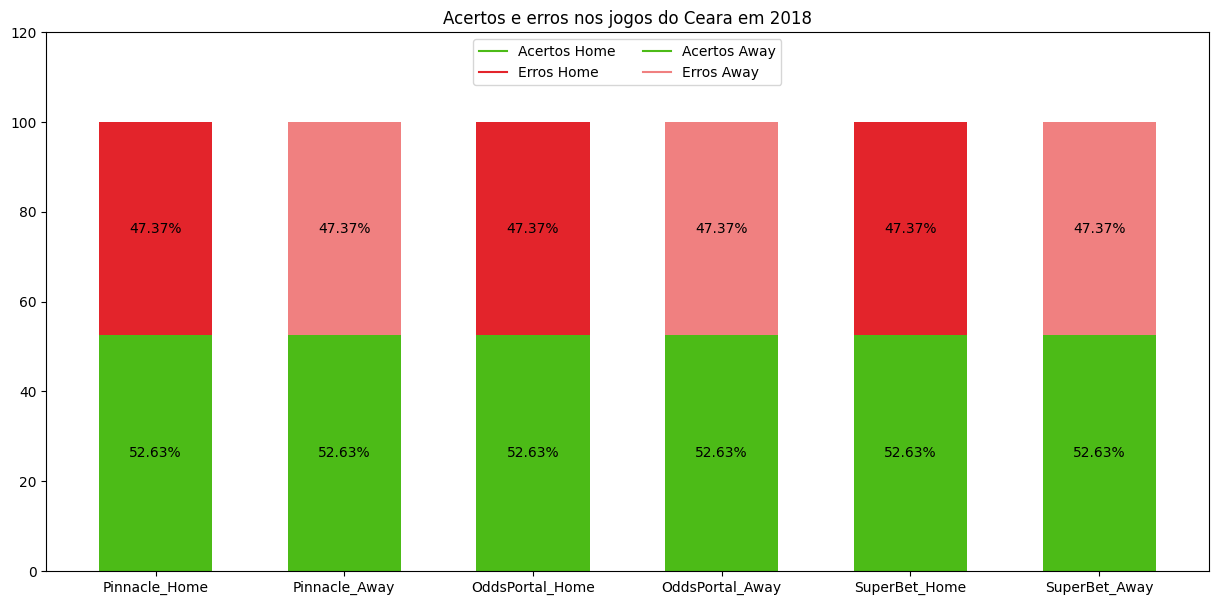

In [67]:
# Ceara: resultados

button1 = widgets.Button(description="2018")
button2 = widgets.Button(description="2019")
button3 = widgets.Button(description="2020")
button4 = widgets.Button(description="2021")
button5 = widgets.Button(description="2022")
out = widgets.Output()

buttons = widgets.VBox(children=[button1, button2, button3, button4, button5])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

casas = ('Pinnacle_Home', 'Pinnacle_Away','OddsPortal_Home','OddsPortal_Away','SuperBet_Home', 'SuperBet_Away')


def graf(ano): 
    aux_home = df.loc[((df['Season']==ano)& (df['Home']=='Ceara'))]
    aux_away = df.loc[((df['Season']==ano)& (df['Home']=='Ceara'))]

    porc_aux = {
    'Acertos': np.array([
        aux_home.value_counts(aux_home['PR']=='A')[True]*100/aux_home.value_counts(aux_home['PR']).sum(),
        aux_away.value_counts(aux_away['PR']=='A')[True]*100/aux_away.value_counts(aux_away['PR']).sum(),
        aux_home.value_counts(aux_home['OR']=='A')[True]*100/aux_home.value_counts(aux_home['OR']).sum(),
        aux_away.value_counts(aux_away['OR']=='A')[True]*100/aux_away.value_counts(aux_away['OR']).sum(),
        aux_home.value_counts(aux_home['SR']=='A')[True]*100/aux_home.value_counts(aux_home['SR']).sum(),
        aux_away.value_counts(aux_away['SR']=='A')[True]*100/aux_away.value_counts(aux_away['SR']).sum()
        ]),
    'Erros': np.array([
        aux_home.value_counts(aux_home['PR']=='A')[False]*100/aux_home.value_counts(aux_home['PR']).sum(),
        aux_away.value_counts(aux_away['PR']=='A')[False]*100/aux_away.value_counts(aux_away['PR']).sum(),
        aux_home.value_counts(aux_home['OR']=='A')[False]*100/aux_home.value_counts(aux_home['OR']).sum(),
        aux_away.value_counts(aux_away['OR']=='A')[False]*100/aux_away.value_counts(aux_away['OR']).sum(),
        aux_home.value_counts(aux_home['SR']=='A')[False]*100/aux_home.value_counts(aux_home['SR']).sum(),
        aux_away.value_counts(aux_away['SR']=='A')[False]*100/aux_away.value_counts(aux_away['SR']).sum()
    ]),
    }
    fig, ax = plt.subplots()
    bottom = np.zeros(6)

    for valor, porc_aux in porc_aux.items():
        p = ax.bar(casas, porc_aux, width, label=valor, bottom=bottom, 
               color=('#4CBB17' if valor == 'Acertos' else '#E3242B',"#4CBB17"if valor == 'Acertos' else 'lightcoral'))
        bottom += porc_aux
        ax.bar_label(p, label_type='center', fmt=lambda x: f'{x:.2f}%')

    ax.set_title(f'Acertos e erros nos jogos do Ceara em {ano}')
    line1, = ax.plot([-10, -10, -10], label='Acertos Away', color='#4CBB17')
    line2, = ax.plot([-10, -10, -10], label='Erros Away', color="lightcoral")
    line3, = ax.plot([-10, -10, -10], label='Acertos Home', color='#4CBB17')
    line4, = ax.plot([-10, -10, -10], label='Erros Home', color='#E3242B')
    ax.legend(handles=[line3, line4, line1, line2], loc='upper center', ncols=2)
    ax.set_ylim(0, 120)
    fig.set_size_inches(15, 7)
    clear_output(wait=True)
    plt.show()
    display(all_widgets)

def chamar_botao_2018(b):
    graf(2018)

def chamar_botao_2019(b):
    graf(2019)

def chamar_botao_2020(b):
    graf(2020)

def chamar_botao_2021(b):
    graf(2021)

def chamar_botao_2022(b):
    graf(2022)

if button1.on_click(chamar_botao_2018):
    print('chamar')

if button2.on_click(chamar_botao_2019):
    print('chamar')

if button3.on_click(chamar_botao_2020):
    print('chamar')

if button4.on_click(chamar_botao_2021):
    print('chamar')

if button5.on_click(chamar_botao_2022):
    print('chamar')

- **Análise dos times onde a Pinnacle teve maiores porcentagens de acerto nos anos de 2020 a 2022**

Para essa etapa decidimos analisar os 5 times onde a Pinnacle teve mais acertos nos anos de 2020, 2021 e 2022 

In [68]:
times = df['Home'].unique()

porcentagens_3_anos = []
anos = [ano for ano in range(2020,2023)]

# Salva os dados de acertos e erros da casa Pinnacle para os times de 2020, 2021 e 2022 em um dataframe com os times, anos e porcentagens

for time in times:
    for ano in anos:
        var_aux = df.loc[((df['Season']==ano) & ((df['Home']==time) | (df['Away']==time)))]
        if var_aux.shape[0] == 0:
            continue
        acert_aux = var_aux.value_counts(var_aux['PR']=='A')[True]*100/var_aux.value_counts(var_aux['PR']).sum()
        erro_aux = 100-acert_aux
        porcentagens_3_anos.append({'Time':time,'Ano':ano,'Acertos':acert_aux,'Erros':erro_aux})    

df_aux = pd.DataFrame(porcentagens_3_anos)

# Ordenar o dataframe para que os times com menores erros fossem os primeiros

df_aux = df_aux.sort_values(by='Erros')

Em uma segunda etapa, optamos por criar um dataset com as posições, por rodada, dos times com maior e menor acerto, para avaliar se existe alguma relação entre estas posições e os resultados da casa de aposta Pinnacle. 
Para isso filtramos os times do topo e do final do dataframe df_aux para obter os times com maior e menor acerto, respectivamente, e a partir desses resultados pesquisamos as posições por rodadas desse time e salvamos em um arquivo csv chamado de "classificacao.csv" que será usado na construção dos gráficos. A seguir tem o exemplo dos filtros que fizemos para obter os times, ano a ano.

In [70]:
# Exemplo da verificação que fizemos para obter os times de maior porcentagem da Pinnacle em 2020

df_aux.loc[df_aux['Ano']==2020].head()

,Time,Ano,Acertos,Erros
22,Atletico-MG,2020,57.894737,42.105263
3,Sport Recife,2020,57.894737,42.105263
19,Flamengo RJ,2020,57.894737,42.105263
25,Coritiba,2020,57.894737,42.105263
13,Bahia,2020,55.263158,44.736842


In [71]:
# Exemplo da verificação que fizemos para obter os times de menor porcentagem da Pinnacle em 2020

df_aux.loc[df_aux['Ano']==2020].tail()

,Time,Ano,Acertos,Erros
27,Santos,2020,47.368421,52.631579
36,Gremio,2020,42.105263,57.894737
30,Sao Paulo,2020,39.473684,60.526316
5,Botafogo RJ,2020,39.473684,60.526316
16,Atletico GO,2020,36.842105,63.157895


C:\Users\mohar\AppData\Local\Temp\ipykernel_7812\1610270193.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\mohar\AppData\Local\Temp\ipykernel_7812\1610270193.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


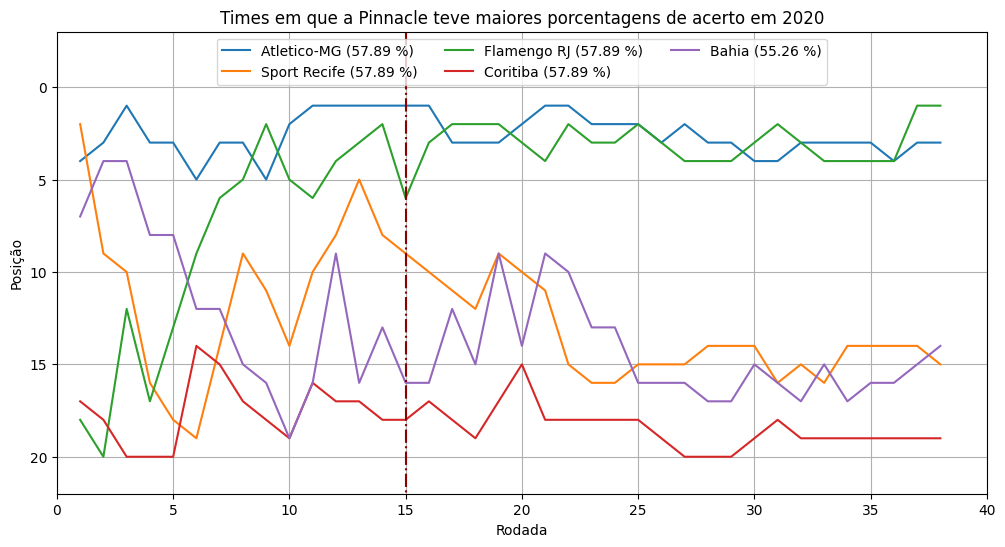

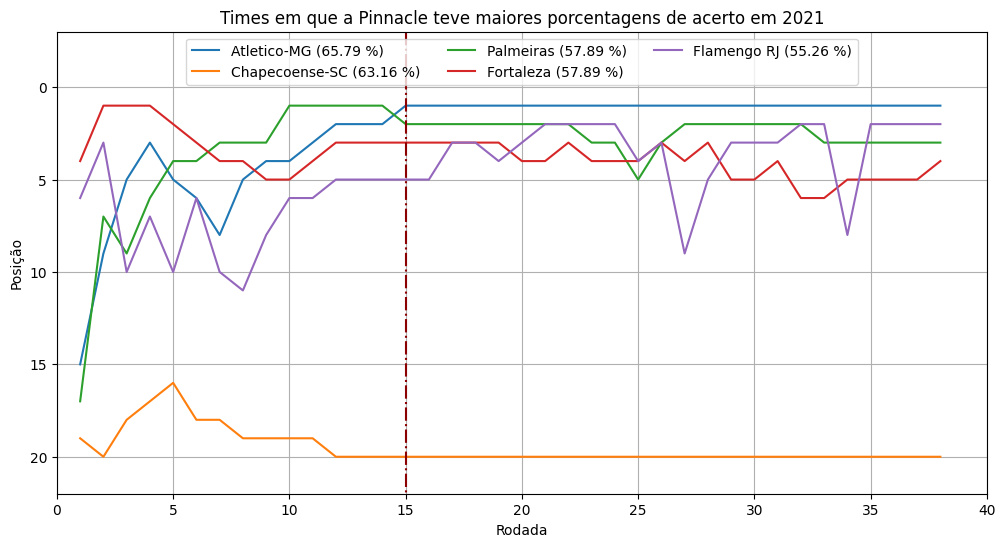

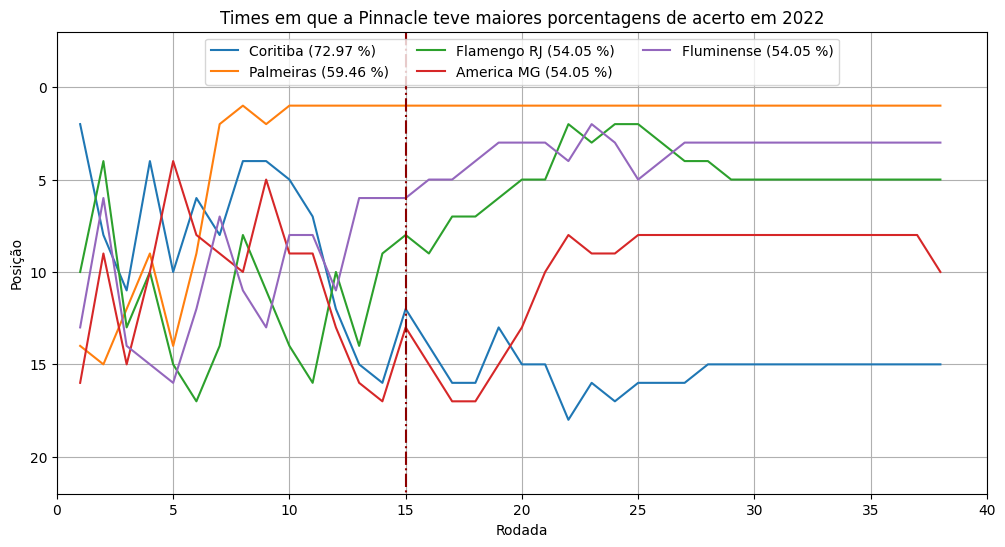

In [72]:
# Importar dataset de classificação

df_c = pd.read_csv('classificacao.csv')
df_c.head()

for ano in anos:  
    df_a_ano = df_aux[df_aux['Ano']==ano].head()
    df_a_ano['Time'].unique()

    fig, ax = plt.subplots()
    for time in df_a_ano['Time'].unique():
        acertos_3 = float(df_aux.loc[(df_aux['Time'] == time) & (df_aux['Ano'] == ano)]['Acertos'].values)
        erros_3 = float(df_aux.loc[(df_aux['Time'] == time) & (df_aux['Ano'] == ano)]['Erros'].values)
        total_3 = acertos_3+erros_3
        porc_acertos = acertos_3*100/total_3
        d_time = df_c.loc[((df_c['Time'] == time)&(df_c['Ano'] == ano))]
        ax.plot(d_time['Rodada'],d_time['Posicao'], label=f'{time} ({round(porc_acertos,2)} %)')

    ax.set_xlabel('Rodada')
    ax.set_ylabel('Posição')
    ax.set_title(f'Times em que a Pinnacle teve maiores porcentagens de acerto em {ano}')
    ax.legend()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.ylim(22, -3) 
    plt.xlim(0,40)
    plt.grid()
    ax.legend(loc='upper center', ncols=3)
    plt.plot((15,15), (-3,22), '-.', color='darkred')
    plt.show()


C:\Users\mohar\AppData\Local\Temp\ipykernel_7812\3205938915.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\mohar\AppData\Local\Temp\ipykernel_7812\3205938915.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


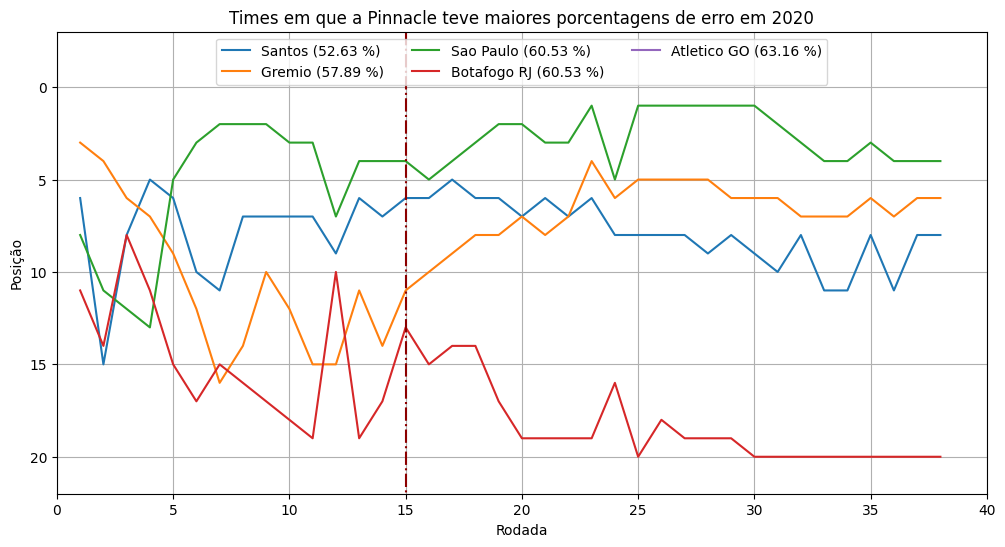

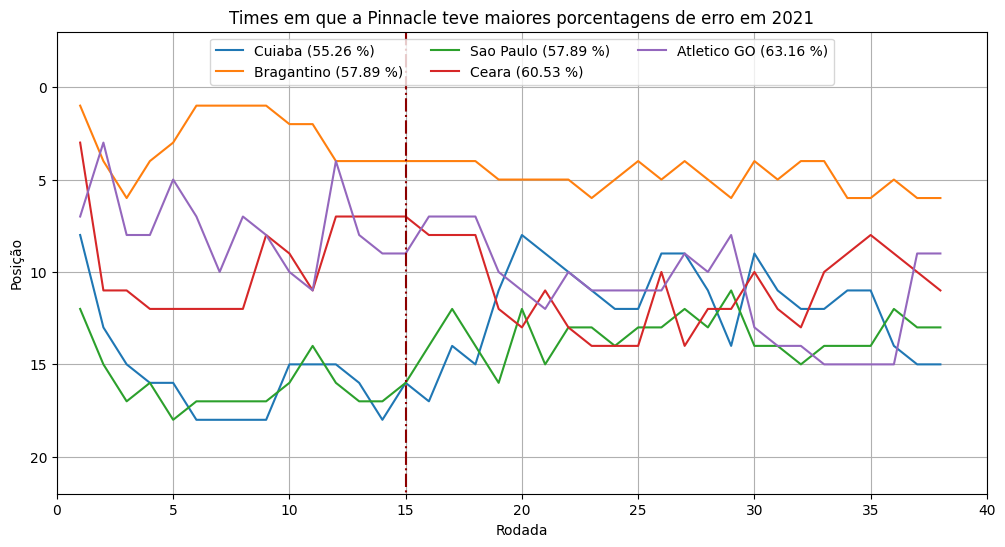

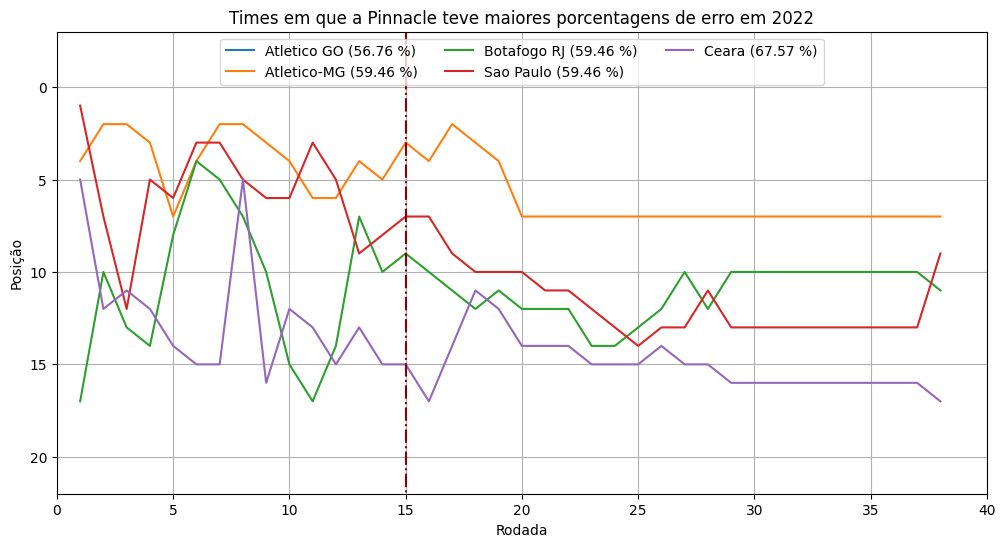

In [73]:
df_aux = df_aux.sort_values(by='Erros')

for ano in anos:  
    df_a_ano = df_aux[df_aux['Ano']==ano].tail()
    df_a_ano['Time'].unique()

    fig, ax = plt.subplots()
    for time in df_a_ano['Time'].unique():
        acertos_3 = float(df_aux.loc[(df_aux['Time'] == time) & (df_aux['Ano'] == ano)]['Acertos'].values)
        erros_3 = float(df_aux.loc[(df_aux['Time'] == time) & (df_aux['Ano'] == ano)]['Erros'].values)
        total_3 = acertos_3+erros_3
        porc_erros = erros_3*100/total_3
        d_time = df_c.loc[((df_c['Time'] == time)&(df_c['Ano'] == ano))]
        ax.plot(d_time['Rodada'],d_time['Posicao'], label=f'{time} ({round(porc_erros,2)} %)')

    ax.set_xlabel('Rodada')
    ax.set_ylabel('Posição')
    ax.set_title(f'Times em que a Pinnacle teve maiores porcentagens de erro em {ano}')
    ax.legend()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.ylim(22, -3) 
    plt.xlim(0,40)
    plt.grid()
    ax.legend(loc='upper center', ncols=3)
    plt.plot((15,15), (-3,22), '-.', color='darkred')
    plt.show()

<center> <img src="final.jpg">

<center> 